<a href="https://colab.research.google.com/github/bkvkrll/Theory-of-Probability-and-Mathematical-Statistics/blob/main/lesson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [9]:
sal = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])
def mean(sal):
    if len(sal) > 0:
        mean1 = sal.sum() / len(sal)
        mean2 = sal.mean()
        print(f'Среднее арифметическое равно {mean1} ({mean2})')

def std(sal):
    if len(sal) > 0:
        std1 = np.sqrt(((sal - sal.mean()) ** 2).sum() / len(sal))
        std2 = sal.std(ddof=0)
        print(f'Среднее квадратичное отклонение {std1} ({std2})')

def var1(sal):
    if len(sal) > 0:
        var1 = ((sal - sal.mean()) ** 2).sum() / len(sal)
        var2 = sal.var(ddof=0)
        print(f'Cмещенная оценка дисперсии  {var1} ({var2})')

def var2(sal):
    if len(sal) > 0:
        var_1 = ((sal - sal.mean()) ** 2).sum() / (len(sal) - 1)
        var_2 = sal.var(ddof=1)
        print(f'Несмещенная оценка дисперсии  {var_1} ({var_2})')

mean(sal)
std(sal)
var1(sal)
var2(sal)

Среднее арифметическое равно 65.3 (65.3)
Среднее квадратичное отклонение 30.823854398825596 (30.823854398825596)
Cмещенная оценка дисперсии  950.11 (950.11)
Несмещенная оценка дисперсии  1000.1157894736842 (1000.1157894736842)


Задача 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [10]:

df_sal = pd.DataFrame(sal)
q1 = df_sal[0].quantile(0.25)
q3 = df_sal[0].quantile(0.75)
iqr = q3 - q1

print(f'Первый квартиль: {q1}')
print(f'Трейтий квартиль: {q3}')
print(f'Интерквартильное расстояние: {iqr}')

Первый квартиль: 42.0
Трейтий квартиль: 81.0
Интерквартильное расстояние: 39.0


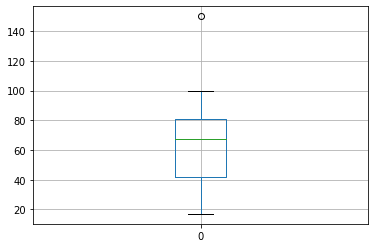

In [11]:
df_sal.boxplot()

In [14]:
boxplot = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
outliers = df_sal.loc[(df_sal[0] < boxplot[0]) | (df_sal[0] > boxplot[1])]
print(f'Выбросы: {outliers[0].value_counts()}')

Выбросы: 150    1
Name: 0, dtype: int64


Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

In [16]:
a=0.8 #Вероятность того, что студент факультета A сдаст первую сессию
b=0.7 #Вероятность того, что студент факультета B сдаст первую сессию
c=0.9 #Вероятность того, что студент факультета C сдаст первую сессию
pa=0.25 #Вероятность, что учится на факультете А
pb=0.25 #Вероятность, что учится на факультете B
pc=0.5 #Вероятность, что учится на факультете C
p=a*pa+b*pb+c*pc #Полная вероятность
print(f'Вероятность, что студент учится на факультете A: {a*pa/p}')
print(f'Вероятность, что студент учится на факультете B: {b*pb/p}')
print(f'Вероятность, что студент учится на факультете C: {c*pc/p}')

Вероятность, что студент учится на факультете A: 0.24242424242424246
Вероятность, что студент учится на факультете B: 0.21212121212121213
Вероятность, что студент учится на факультете C: 0.5454545454545455
